In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from math import comb

plt_style = {"text.usetex": True,
             "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
             "axes.spines.right" : False,
             "axes.spines.top" : False,
             "font.size": 22,
             "savefig.dpi": 600,
             "savefig.bbox": 'tight'
            }

In [2]:
y = np.asarray([89.7, 81.4, 84.5, 84.8, 87.3, 79.7, 85.1, 
     91.7, 83.7, 84.5, 84.7, 86.1, 83.2, 91.9, 
     86.3, 79.3, 82.6, 89.1, 83.7, 88.5
    ])
labels = np.random.choice(np.hstack((np.zeros(10), np.ones(10))), size=20)

In [4]:
print(labels)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.]


## Random Sample Method

In [3]:
n_A = sum(labels==1)
n_B = sum(labels==0)
mean_A = np.mean(y[labels==1])
mean_B = np.mean(y[labels==0])
print('Mean value with A :  %.2f'%mean_A)
print('Mean value with B :  %.2f'%mean_B)
print('Difference : %.2f'%(mean_A-mean_B))

Mean value with A :  86.02
Mean value with B :  84.23
Difference : 1.79


In [5]:
# Compute sample variance
y_A = y[labels==1]
y_B = y[labels==0]
numer = sum((y_A- mean_A)**2) + sum((y_B- mean_B)**2)
dof = n_A+n_B-2
s2 = numer/dof
print('Sample variance : ', s2)

Sample variance :  12.268400488400488


In [6]:
# compute t-deviate
delta = 0
t = (mean_A-mean_B-delta)/np.sqrt(s2*(1/n_A + 1/n_B))

In [7]:
from scipy.stats import t as tdist
print('t-statistic: ', tdist.sf(t, dof))

t-statistic:  0.14544122904852413


## Randomized Design Method

In [18]:
num_possible = comb(20, 10)
print('Total assignments possible: ', num_possible)

Total assignments possible:  184756


In [13]:
from math import comb

pounds = np.array([29.2, 11.4, 26.6, 23.7, 25.3, 28.5, 14.2, 17.9, 16.5, 21.1, 24.3])
labels = np.array([1,1,0,0,1,0,0,0,1,1,0])
mean_A = np.mean(pounds[labels==1])
mean_B = np.mean(pounds[labels==0])
print('Observed difference : %.2f'%(mean_A-mean_B))
num_possible = comb(len(pounds), 5)
print('Total assignments possible: ', num_possible)

Observed difference : -1.83
Total assignments possible:  462


In [14]:
import itertools

all_asgs = list(itertools.combinations(np.arange(len(pounds)), 5))
all_diff = []
for asg in all_asgs:
    A = np.asarray(asg)
    B = np.setdiff1d(np.arange(len(pounds)), A)
    yA = pounds[A]
    yB = pounds[B]
    diff = np.mean(yA)-np.mean(yB)
    all_diff.append(diff)

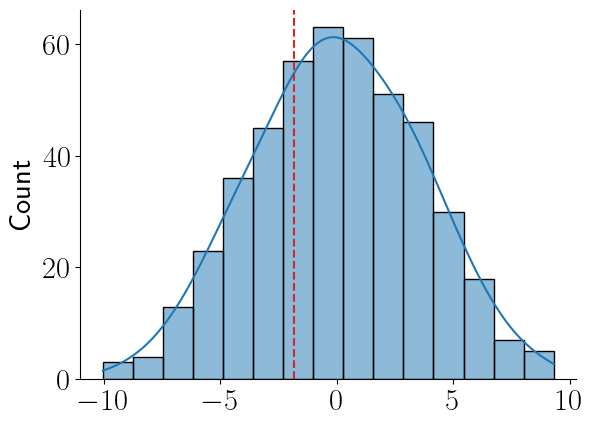

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context(plt_style):
    fig, ax = plt.subplots()
    sns.histplot(x=all_diff, kde=True)
    ax.axvline(mean_A-mean_B, color='tab:red', ls='--')
    plt.savefig('./figures/lec05_1.pdf')
    plt.show()

In [17]:
print('Approximate probability : ', 55/462)

Approximate probability :  0.11904761904761904
